![Imgur](https://i.imgur.com/5pXzCIu.png)

# Data Science va Sun'iy Intellekt Praktikum

## 5-MODUL. Machine Learning.

### Amaliyot. Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head(20)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Yuqoridagi jadvalda MohirDev MChJ tomonidan turli OAV larda (`TV`, `Radio`, `Newspaper`) berilgan reklamalar soni va mos keluvchi savdolar (`Sales`) berilgan.

Sizning vazifangiz:
1. Aynan qaysi turdagi OAVda reklama berish savdo o'sishiga ta'sir qiladi aniqlash
2. Topilgan bog'liqlik asosida Simple Linear Regression algorithmi yordamida bashorat modelini qurish.

Ushbu amaliyotda sizning vazifangiz berilgan dataset yordamida Simple Linear Regression model yaratish:
- CRISP-DM metodologiyasiga amal qiling!
- Simple linear regression qo'llash uchun 1 ta ustunni tanlab oling.

In [7]:
df.corrwith(df['Sales']).sort_values(ascending=False)
#Sales va TV o'rtasida eng yaxshi korrelyatsiya
#Shuning uchun TV ustunini bashorat uchun tanlab olamiz

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
dtype: float64

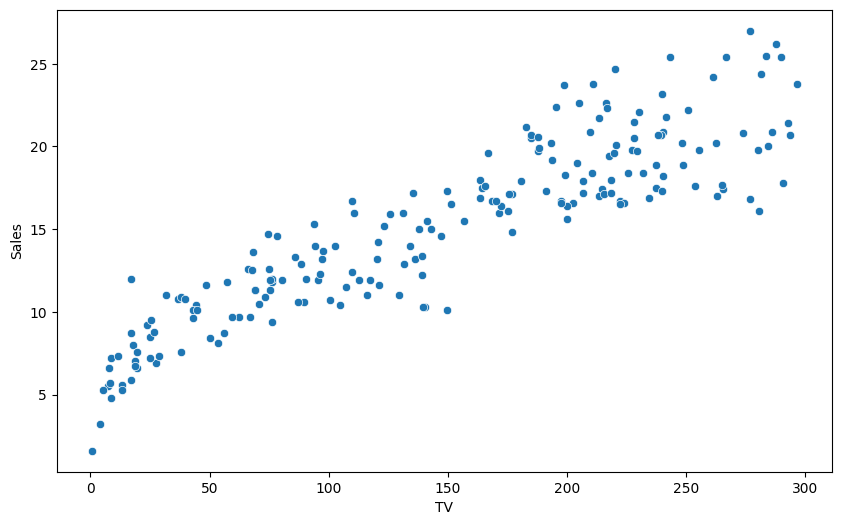

In [8]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.show()

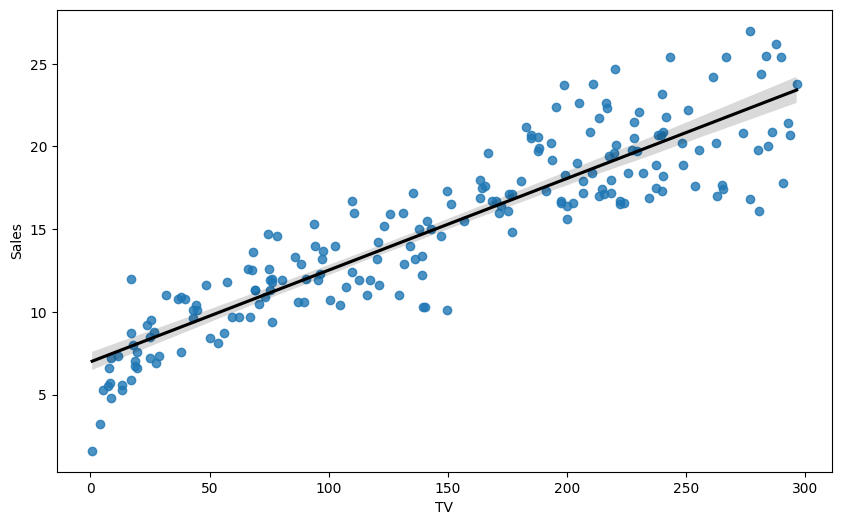

In [14]:
plt.figure(figsize=(10,6))
sns.regplot(data=df, x='TV', y='Sales', line_kws={"color": "black"})
plt.show()

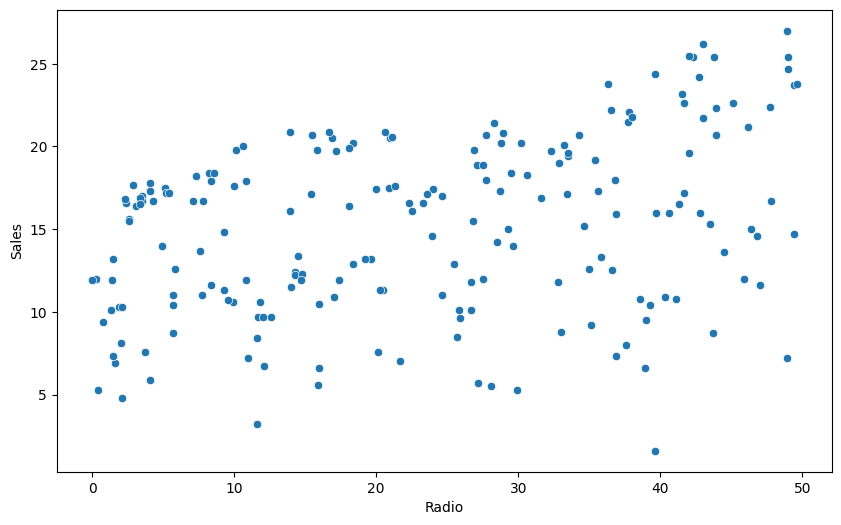

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Radio', y='Sales')
plt.show()

In [16]:
df.shape
#ma'lumot kam shu uchun trainga 90% olamiz

(200, 4)

In [18]:
df = df[['TV', 'Sales']].copy()
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [19]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [20]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.05513263076693964
theta0=7.044916461655207


Text(0, 0.5, 'Sales')

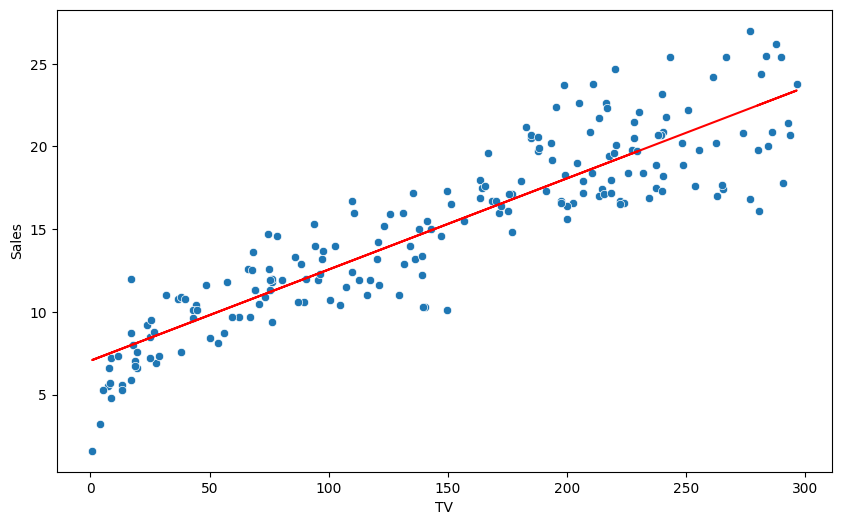

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TV', y='Sales')
plt.plot(x_train, theta1*x_train + theta0, '-r')
plt.xlabel("TV")
plt.ylabel("Sales")

In [22]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [23]:
y_predicted = LR_model.predict(x_test)

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predicted)
RMSE = np.sqrt(mean_squared_error(y_test, y_predicted))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.037955356968121
RMSE=2.5103822386472214


#Cross validation

In [27]:
X=np.asanyarray(df[['TV']])
y=np.asanyarray(df[['Sales']])

In [26]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Std.dev:", scores.std())

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LR_model, X, y, scoring="neg_mean_squared_error", cv=10)
LR_rmse_scores = np.sqrt(-scores)

In [30]:
display_scores(scores=LR_rmse_scores)

Scores: [2.02277232 2.54443129 2.50496943 1.77726762 2.14270027 1.81791472
 2.40075979 2.96770188 2.29698131 2.38875195]
Mean: 2.286425059043425
Std.dev: 0.3422038040407936
